# Final Project: Getting Unstuck Reflections

## Framing

## Introduction
We have 3784 projects from [Getting Unstuck](https://www.gettingunstuck.gse.harvard.edu), a 21-day summer online learning experience from July 2018. These are projects that K-12 teachers made in Scratch, and each day they responded to a different prompt. Projects vary in size and scope; participants had varied levels of experience. 

## Research question(s)
* What did people learn? 
* How did they talk about what they learned? 
* How did reflecting support their learning?

## Hypotheses

    
### Hypothesis one: Learners who wrote more reflections had a deeper/multifaceted learning experience/their reflections supported their learning in meaningful ways.

* They participated more in the online community.
* Their computational fluency was deeper.
* They learned more aobut their own tendencies for "getting stuck."

#### Background:
We know from constructionist theories that environments that promote creating, sharing, reflecting, and personalizing can support learners in engaging in deeply meaningful work (Brennan, 2013). Often, the "reflecting" part is taken for granted, or seen as less essential when teachers have limited amounts of time. And yet, supporting teachers in becoming increasingly reflective practitioners can support productive growth of their teaching practice (Schön, 1987).

In what ways does reflecting help learners learn/help us as researchers understand what learners made? 


### Hypothesis two: Learners who tagged each other more often had a deeper learning experience.

* They participated more in the online community.
* Their computational fluency was deeper.
* They were able to support others (reciprocal tagging?)

#### Background:
From the communities of practice literature (Lave & Wenger, 1991), we know that learners who engage in legitimate peripheral participation in a community of practice can develop meaningfully from novices to experts. 

In the Getting Unstuck online community, did learners feel like they were in a community? Or did they operate by themselves, receiving the challenge emails each day and posting their projects? Did they interact with others' projects? How did those interactions support their learning? (See also: Illich, 1970).






## Results
    * how are you planning to test each hypothesis? What models are you thinking of using?
    * what are the best results you can hope for? Is that interesting / relevant for other researchers?
    * what are implications of your potential findings for practioners?
    
### Hypothesis One
I'm hoping to test the first hypothesis by doing some descriptive work to get a sense of what's in the data: sentiment analysis, topic modeling. 
* How many projects have written text accompanying them?
* Of those projects, how many include text that counts as "reflection"?
* Of those reflective projects, what did they talk about?

### Hypothesis Two
I'm hoping to perhaps build a dataframe that contains rows for each person who used tags, then build out columns/counts for the number of tags that happened? I'll need to sync up the usernames to author ids - must pull from another spreadsheet for that.

## Threads
    * Describe issues that might arise during the analyses above
    * Come up with backup plans in case you run into theses issues
    
### Issues
* Insufficient data in each project! (not enough projects)
* Can't get all the data from the API I need (comments, favorites, etc)
* How to measure computational fluency? One idea is to look at the Creative Computing Guide and say; teachers teaching with this "should" be able to use more than one sprite, more than one costume, and also be able to use loops, initialization, parallelism, and variables...

### Backup plans
* Still conduct a lot of descriptive analysis of the data and try a few different analytical angles, as well as writing a lit review of text analysis methods for reflective/student writing
* Expand analysis to include not only reflections (text data), but also Scratch projects (look at their blocks)
    
### Papers to explore
* Q. Liu, S. Zhang, Q. Wang and W. Chen, "Mining Online Discussion Data for Understanding Teachers Reflective Thinking," in IEEE Transactions on Learning Technologies, vol. 11, no. 2, pp. 243-254, 1 April-June 2018.
doi: 10.1109/TLT.2017.2708115. https://ieeexplore.ieee.org/document/7934007
* http://users.on.net/~kirsty.kitto/papers/lak15-gibson_kitto-short-FINAL.pdf 
* https://www.ajpe.org/doi/full/10.5688/ajpe80110
* https://www.researchgate.net/publication/328942550_Automatic_Reflective_Writing_Analysis_based_on_Semantic_Concept
* https://link.springer.com/article/10.1007/s40593-019-00174-2 
* https://dl.acm.org/citation.cfm?id=2883951
* https://dl.acm.org/citation.cfm?id=2883955 
* https://eric.ed.gov/?id=EJ1062704
* https://www.tandfonline.com/doi/abs/10.1080/07294360.2010.512627
* https://onlinelibrary.wiley.com/doi/abs/10.1046/j.1365-2923.2002.01227.x 


### Courses to explore
* http://web.stanford.edu/class/cs224n/
* https://monkeylearn.com/sentiment-analysis/
* Datacamp - NLP basics


## Data Exploration

Describe your raw data below; provide definition / explanations for the measures you're using

### Variable explanations
* **studio:** What studio/day each Scratch project is added to (though projects could've been added to the studio/started after everyone else, if a participant acted asynchronously); zero-indexed. 0 is studio 1, 20 is studio 21.
* **id:** The project id (randomly assigned number)
* **title:** Title of the project
* **description:** Online, this is labeled "Notes/Credits"
* **instructions:** Online, this is labeled "Instructions." Reflections are available in both, so one thought is to combine all the written text into one variable for each project, then look to filter out instructions.
* **author/id:** ID of the Scratcher; not linked to their Scratch username
* **image:** cover image for the project (arbitrary)
* **history/created:** date created (online; could've been made in the offline editor, so this is slightly inaccurate)
* **history/modified:** last date modified; doesn't show a history of modifications
* **history/shared:** date shared; likely shared after completion, but could be shared as a draft (and that was highly encouraged)
* **stats/views:** number of views (up to the day data was collected - Aug 2018)
* **stats/loves:** number of loves (up to the day data was collected - Aug 2018)
* **stats/favorites:** number of favorites (or stars; up to the day data was collected - Aug 2018)
* **stats/comments:** number of comments (currently inaccurate)
* **stats/remixes:** number of remixes (currently inaccurate)
* **stats/parent:** if remixed from another project, this column is filled with that project id
* **stats/root:** if remixed from another project, this column is filled with the project id of the root (if there was a string of remixes - see [Remix Tree](https://en.scratch-wiki.info/wiki/Remix#Remix_Trees).

In [1]:
import os

# using glob, find all the csv files in the "Studios" folder
import glob

files = glob.glob('./studios/*.csv')
print(files)



['./studios/studio19.csv', './studios/studio18.csv', './studios/studio20.csv', './studios/studio21.csv', './studios/studio8.csv', './studios/studio9.csv', './studios/studio7.csv', './studios/studio6.csv', './studios/studio4.csv', './studios/studio5.csv', './studios/studio1.csv', './studios/studio2.csv', './studios/studio3.csv', './studios/studio10.csv', './studios/studio11.csv', './studios/studio13.csv', './studios/studio12.csv', './studios/studio16.csv', './studios/studio17.csv', './studios/studio15.csv', './studios/studio14.csv']


In [2]:
# put all CSV files into a data frame

import pandas as pd 
import numpy as np
import re

dfs = []

# iterate over dataframe; create list of dataframes; add studio column
for i,filename in enumerate(files):
    filenum = re.findall(r'\d+',str(filename))
    filenum = int(filenum[0])-1
    df = pd.read_csv(filename, index_col=None, header=0)
    df.insert(0,'studio',filenum)
    dfs.append(df)
    
# concatenate list of dataframes
frame = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

In [3]:
# check what the dataframe looks like

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784 entries, 0 to 3783
Data columns (total 24 columns):
studio                 3784 non-null int64
id                     3784 non-null int64
title                  3784 non-null object
description            2965 non-null object
instructions           3322 non-null object
author/id              3784 non-null int64
image                  3784 non-null object
history/created        3784 non-null object
history/modified       3784 non-null object
history/shared         3784 non-null object
stats/views            3784 non-null int64
stats/loves            3784 non-null int64
stats/favorites        3784 non-null int64
stats/comments         3784 non-null int64
stats/remixes          3784 non-null int64
remix/parent           316 non-null float64
remix/root             316 non-null float64
Unnamed: 16            2 non-null object
description (full)     2 non-null float64
instruction (full)     2 non-null float64
description (blank)    2 non

In [4]:
frame.head(10)

frame.tail(10)

,studio,id,title,description,instructions,author/id,image,history/created,history/modified,history/shared,...,stats/remixes,remix/parent,remix/root,Unnamed: 16,description (full),instruction (full),description (blank),instruction (blank),description.1,instructions.1
3774,13,237543092,Getting Unstuck Day 14,Made for #GettingUnstuck Day 14 #CreativeCompu...,Click the Green Flag and follow the instructions.,287832,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-27T07:49:43.000Z,2018-07-27T08:05:02.000Z,2018-07-27T07:55:50.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3775,13,237685360,Getting Unstuck: Day14,Code Club project 'Chatbot' helped a lot. Thi...,Click on the robot to start!\n\nChat with the ...,34197892,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-29T13:53:18.000Z,2018-07-29T21:25:27.000Z,2018-07-29T21:18:15.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3776,13,237765948,Adivina el animal Getting unstuck day 14,I have learned to count letter positions in wo...,Juego para adivinar nombres de animales. \nInt...,2680901,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T14:49:51.000Z,2018-07-30T15:39:53.000Z,2018-07-30T15:33:13.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3777,13,237771675,getting unstuck day 14,I learn to use join\n,NaN,23020553,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T16:04:24.000Z,2018-08-03T17:47:19.000Z,2018-07-30T16:12:40.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778,13,237823642,#unstuck Day 14 string blocks,I had to look at a video clip o how to string.,Start with clicking on the microphone.,31492686,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T02:56:38.000Z,2018-07-31T07:18:18.000Z,2018-07-31T07:18:18.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3779,13,237860907,Io trovo le lettere,Getting Unstuck 14\nCreare \nCreare un progett...,rispondi,21462276,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T13:37:38.000Z,2018-07-31T14:02:51.000Z,2018-07-31T14:01:14.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3780,13,237999490,Getting Unstuck - Day 14,The challenge for day 14 is to create a projec...,Click the green arrow and enter your name when...,24696341,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-01T22:09:01.000Z,2018-08-01T23:04:55.000Z,2018-08-01T23:01:32.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3781,13,237792845,GETTING UNSTUCK14: FIGURES,NaN,"PRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOCK L...",16573108,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T20:32:00.000Z,2018-08-06T21:50:05.000Z,2018-08-06T21:50:05.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3782,13,238433917,day 14,Create a project that uses the string blocks i...,NaN,24618980,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-07T09:55:31.000Z,2018-08-07T15:51:56.000Z,2018-08-07T10:06:28.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3783,13,238271691,Getting Unstuck - Day 14,"When I was younger, I would always create stag...",Press the green button and wait to hear instru...,25334812,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-05T12:55:06.000Z,2018-08-07T15:51:11.000Z,2018-08-07T15:49:40.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Clean your data in this section, and make sure it's ready to be analyzed for next week!

In [5]:
#drop the unnecessary columns
badColumns = ["stats/comments","stats/remixes","Unnamed: 16",
              "description (full)","instruction (full)","description (blank)",
              "instruction (blank)","description.1","instructions.1"]

for badColumn in badColumns:
    frame = frame.drop(badColumn,axis='columns')
    
frame.head(10)

,studio,id,title,description,instructions,author/id,image,history/created,history/modified,history/shared,stats/views,stats/loves,stats/favorites,remix/parent,remix/root
0,18,237042971,Steven and the Stevens [MV],Animation is hard! And time consuming! But aft...,Press the green flag to watch! (Inspired by St...,2745846,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-22T00:59:37.000Z,2018-07-23T09:27:01.000Z,2018-07-23T09:25:28.000Z,27,16,1,NaN,NaN
1,18,237100206,Grumpy Bubbles,"Big thanks to @jsh for his Day 1 project, Rive...","First, check out @jsh's River Waltz: https://s...",39526,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T00:25:41.000Z,2018-07-23T10:07:59.000Z,2018-07-23T10:07:59.000Z,29,11,0,235484400.0,235484400.0
2,18,237093421,Raindrops,I've found that I don't always initially consi...,Press the green flag.,25705937,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-22T22:22:17.000Z,2018-07-23T13:33:50.000Z,2018-07-23T10:37:53.000Z,29,18,4,NaN,NaN
3,18,237098671,Night Rain,After simulating rain drops for today's challe...,"Press the green flag, allow for the microphone...",25705937,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T00:06:28.000Z,2018-07-23T11:03:43.000Z,2018-07-23T10:38:58.000Z,21,8,4,NaN,NaN
4,18,237111696,Lights,This project was created for Day 19 of Getting...,Enjoy the procession of the clones!,56239,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T03:16:00.000Z,2018-07-23T17:44:58.000Z,2018-07-23T10:59:22.000Z,30,14,7,NaN,NaN
5,18,62591162,Slim Cantore - Penquin Weather Channel Event,\n\n,This project is based on a Weather Story by We...,4615776,https://cdn2.scratch.mit.edu/get_image/project...,2015-05-16T05:27:51.000Z,2018-07-23T11:12:00.000Z,2015-05-21T00:13:38.000Z,32,9,2,24001065.0,24001065.0
6,18,237136651,Unstuck Day 19 Flowers,Three flowers on one stem is a variation from ...,Thanks for today's challenge! I have used clon...,14632339,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T10:50:19.000Z,2018-07-23T19:44:57.000Z,2018-07-23T11:04:11.000Z,9,6,0,NaN,NaN
7,18,237134693,Unstuck Day 19: Using Clones,I did this project for Getting Unstuck challen...,"Play with ripples! \nJust added sound, too.\nS...",214174,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T10:11:35.000Z,2018-07-23T12:17:09.000Z,2018-07-23T11:32:06.000Z,17,10,3,NaN,NaN
8,18,237138514,Day19,NaN,Click on the green flag to start,34225248,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T11:27:54.000Z,2018-07-23T11:38:35.000Z,2018-07-23T11:38:22.000Z,12,4,0,NaN,NaN
9,18,237138676,#019 Getting Unstuck Clones,I didn't have a lot of time to do this today.....,Move mouse around for clones...,20126730,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T11:31:36.000Z,2018-07-23T11:44:12.000Z,2018-07-23T11:41:27.000Z,21,5,0,NaN,NaN


In [6]:
# import all_studios CSV to get the author ID


dfAuthor = pd.read_csv('all_studios.csv', index_col=None, header=0)

dfAuthor.head()

# dfAuthor.info()


,project_id,project_author_id,project_author_username,studio_numberscript_count,variable_count,list_count,comment_count,costume_count,sprite_count,block_count,block_unique_count,random_block_count,Unnamed: 12
0,235615218,34197892,33limekilnsja,1,4,0,0,0,6,2,19,8,0
1,235715853,34197892,33limekilnsja,2,2,0,0,0,3,1,9,8,2
2,235762150,34197892,33limekilnsja,3,3,1,0,0,12,3,13,11,0
3,235832649,34197892,33limekilnsja,4,2,0,0,0,7,4,18,11,0
4,235934422,34197892,33limekilnsja,5,3,0,0,0,6,2,17,12,0


In [7]:
# Look for the author username; add column to dataframe. 

# frame.head()

# match the columns
dfAuthor = dfAuthor.rename(index=str, columns={"project_author_id": "author/id"})

dfAuthor.head()

frame = frame.rename(index=str, columns={"id": "project_id"})
frame.head()



merged_df = pd.merge(frame, dfAuthor, how = 'inner', on = ['project_id','author/id'])

merged_df.tail()

# merged_df.info()

# merged_df = merged_df.drop(['Unnamed: 12'],axis=1)

,studio,project_id,title,description,instructions,author/id,image,history/created,history/modified,history/shared,...,studio_numberscript_count,variable_count,list_count,comment_count,costume_count,sprite_count,block_count,block_unique_count,random_block_count,Unnamed: 12
3758,13,237860907,Io trovo le lettere,Getting Unstuck 14\nCreare \nCreare un progett...,rispondi,21462276,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T13:37:38.000Z,2018-07-31T14:02:51.000Z,2018-07-31T14:01:14.000Z,...,14,2,0,0,0,4,1,19,12,1
3759,13,237999490,Getting Unstuck - Day 14,The challenge for day 14 is to create a projec...,Click the green arrow and enter your name when...,24696341,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-01T22:09:01.000Z,2018-08-01T23:04:55.000Z,2018-08-01T23:01:32.000Z,...,14,2,0,1,0,6,1,21,13,0
3760,13,237792845,GETTING UNSTUCK14: FIGURES,NaN,"PRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOCK L...",16573108,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T20:32:00.000Z,2018-08-06T21:50:05.000Z,2018-08-06T21:50:05.000Z,...,14,23,4,0,0,11,6,77,22,1
3761,13,238433917,day 14,Create a project that uses the string blocks i...,NaN,24618980,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-07T09:55:31.000Z,2018-08-07T15:51:56.000Z,2018-08-07T10:06:28.000Z,...,14,3,5,0,0,4,1,52,20,4
3762,13,238271691,Getting Unstuck - Day 14,"When I was younger, I would always create stag...",Press the green button and wait to hear instru...,25334812,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-05T12:55:06.000Z,2018-08-07T15:51:11.000Z,2018-08-07T15:49:40.000Z,...,14,1,4,0,0,3,1,42,11,0


In [8]:
merged_df.tail()

merged_df.info()
# 3763 entries, 0 to 3762 <-- when merged on inner
# 3862 <-- when merged on left
# For left, that means that there are all the ones from frame + ones from dfAuthor. But dfAuthor was collected
# later, so it makes sense that there's more of them. 
# going to do inner, then.

frame.info()
# 3784 entries

frame.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763 entries, 0 to 3762
Data columns (total 26 columns):
studio                       3763 non-null int64
project_id                   3763 non-null int64
title                        3763 non-null object
description                  2954 non-null object
instructions                 3323 non-null object
author/id                    3763 non-null int64
image                        3763 non-null object
history/created              3763 non-null object
history/modified             3763 non-null object
history/shared               3763 non-null object
stats/views                  3763 non-null int64
stats/loves                  3763 non-null int64
stats/favorites              3763 non-null int64
remix/parent                 321 non-null float64
remix/root                   321 non-null float64
project_author_username      3763 non-null object
studio_numberscript_count    3763 non-null int64
variable_count               3763 non-null int64
l

,studio,project_id,title,description,instructions,author/id,image,history/created,history/modified,history/shared,stats/views,stats/loves,stats/favorites,remix/parent,remix/root
3779,13,237860907,Io trovo le lettere,Getting Unstuck 14\nCreare \nCreare un progett...,rispondi,21462276,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T13:37:38.000Z,2018-07-31T14:02:51.000Z,2018-07-31T14:01:14.000Z,2,2,0,NaN,NaN
3780,13,237999490,Getting Unstuck - Day 14,The challenge for day 14 is to create a projec...,Click the green arrow and enter your name when...,24696341,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-01T22:09:01.000Z,2018-08-01T23:04:55.000Z,2018-08-01T23:01:32.000Z,2,1,0,NaN,NaN
3781,13,237792845,GETTING UNSTUCK14: FIGURES,NaN,"PRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOCK L...",16573108,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T20:32:00.000Z,2018-08-06T21:50:05.000Z,2018-08-06T21:50:05.000Z,2,1,0,NaN,NaN
3782,13,238433917,day 14,Create a project that uses the string blocks i...,NaN,24618980,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-07T09:55:31.000Z,2018-08-07T15:51:56.000Z,2018-08-07T10:06:28.000Z,2,1,0,NaN,NaN
3783,13,238271691,Getting Unstuck - Day 14,"When I was younger, I would always create stag...",Press the green button and wait to hear instru...,25334812,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-05T12:55:06.000Z,2018-08-07T15:51:11.000Z,2018-08-07T15:49:40.000Z,2,1,0,NaN,NaN


In [9]:
# Merge the two columns of stuff people wrote

merged_df["writing"] = merged_df["description"].map(str) + merged_df["instructions"]

merged_df.head()

merged_df.tail()

,studio,project_id,title,description,instructions,author/id,image,history/created,history/modified,history/shared,...,variable_count,list_count,comment_count,costume_count,sprite_count,block_count,block_unique_count,random_block_count,Unnamed: 12,writing
3758,13,237860907,Io trovo le lettere,Getting Unstuck 14\nCreare \nCreare un progett...,rispondi,21462276,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T13:37:38.000Z,2018-07-31T14:02:51.000Z,2018-07-31T14:01:14.000Z,...,2,0,0,0,4,1,19,12,1,Getting Unstuck 14\nCreare \nCreare un progett...
3759,13,237999490,Getting Unstuck - Day 14,The challenge for day 14 is to create a projec...,Click the green arrow and enter your name when...,24696341,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-01T22:09:01.000Z,2018-08-01T23:04:55.000Z,2018-08-01T23:01:32.000Z,...,2,0,1,0,6,1,21,13,0,The challenge for day 14 is to create a projec...
3760,13,237792845,GETTING UNSTUCK14: FIGURES,NaN,"PRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOCK L...",16573108,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T20:32:00.000Z,2018-08-06T21:50:05.000Z,2018-08-06T21:50:05.000Z,...,23,4,0,0,11,6,77,22,1,"nanPRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOC..."
3761,13,238433917,day 14,Create a project that uses the string blocks i...,NaN,24618980,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-07T09:55:31.000Z,2018-08-07T15:51:56.000Z,2018-08-07T10:06:28.000Z,...,3,5,0,0,4,1,52,20,4,NaN
3762,13,238271691,Getting Unstuck - Day 14,"When I was younger, I would always create stag...",Press the green button and wait to hear instru...,25334812,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-05T12:55:06.000Z,2018-08-07T15:51:11.000Z,2018-08-07T15:49:40.000Z,...,1,4,0,0,3,1,42,11,0,"When I was younger, I would always create stag..."


In [10]:
# moving the columns I want to the front.
cols = merged_df.columns.tolist()
print(cols)

cols = ['studio', 'project_id', 'title', 'description', 'instructions', 'writing', 'author/id', 
        'project_author_username','image', 
        'history/created', 'history/modified', 'history/shared', 'stats/views', 'stats/loves', 
        'stats/favorites', 'remix/parent', 'remix/root', 'studio_numberscript_count', 
        'variable_count', 'list_count', 'comment_count', 'costume_count', 'sprite_count', 'block_count', 
        'block_unique_count', 'random_block_count', 'Unnamed: 12', ]

merged_df = merged_df[cols]

# cols.insert(0, cols.pop(cols.index('writing')))
# # print(cols)

# cols.insert(0, cols.pop(cols.index('project_author_username')))
# print(cols)

# merged_df = df.reindex(columns= cols)

merged_df.tail()


['studio', 'project_id', 'title', 'description', 'instructions', 'author/id', 'image', 'history/created', 'history/modified', 'history/shared', 'stats/views', 'stats/loves', 'stats/favorites', 'remix/parent', 'remix/root', 'project_author_username', 'studio_numberscript_count', 'variable_count', 'list_count', 'comment_count', 'costume_count', 'sprite_count', 'block_count', 'block_unique_count', 'random_block_count', 'Unnamed: 12', 'writing']


,studio,project_id,title,description,instructions,writing,author/id,project_author_username,image,history/created,...,studio_numberscript_count,variable_count,list_count,comment_count,costume_count,sprite_count,block_count,block_unique_count,random_block_count,Unnamed: 12
3758,13,237860907,Io trovo le lettere,Getting Unstuck 14\nCreare \nCreare un progett...,rispondi,Getting Unstuck 14\nCreare \nCreare un progett...,21462276,ratogi,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T13:37:38.000Z,...,14,2,0,0,0,4,1,19,12,1
3759,13,237999490,Getting Unstuck - Day 14,The challenge for day 14 is to create a projec...,Click the green arrow and enter your name when...,The challenge for day 14 is to create a projec...,24696341,GCarganilla,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-01T22:09:01.000Z,...,14,2,0,1,0,6,1,21,13,0
3760,13,237792845,GETTING UNSTUCK14: FIGURES,NaN,"PRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOCK L...","nanPRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOC...",16573108,paolaernesta,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T20:32:00.000Z,...,14,23,4,0,0,11,6,77,22,1
3761,13,238433917,day 14,Create a project that uses the string blocks i...,NaN,NaN,24618980,danaespiliadi,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-07T09:55:31.000Z,...,14,3,5,0,0,4,1,52,20,4
3762,13,238271691,Getting Unstuck - Day 14,"When I was younger, I would always create stag...",Press the green button and wait to hear instru...,"When I was younger, I would always create stag...",25334812,heyjessi,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-05T12:55:06.000Z,...,14,1,4,0,0,3,1,42,11,0


# Analysis

## Topic Modeling


In [11]:
# Import Spacy

import sys
!{sys.executable} -m pip install spacy

In [12]:
!{sys.executable} -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/paulina/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/paulina/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [14]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

In [15]:
# Clean docs
# Create function that takes in a piece of text and separates into individual words


punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', 
               ',', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']

def clean_list_of_texts(texts):
    
    cleaned_docs = []

    for i,doc in enumerate(texts):
        # replace return carriage with white space
        doc = doc.replace('\n', ' ')
        # remove punctuation
        for punc in punctuation: 
            doc = doc.replace(punc, ' ')
        # remove numbers
        for i in range(10):
            doc = doc.replace(str(i), ' ')
        # remove stop words
        for stop_word in stop_words:
            doc = doc.replace(' ' + stop_word + ' ', ' ')
        # lowercase
        words = doc.split()
        # convert to lower case
        doc = ' '.join([word.lower() for word in words])
        # remove single characters
        doc = [x for x in doc.split() if len(x) > 2]
        doc = " ".join(doc)
        # lemmatization
        doc = nlp(doc)
        doc = " ".join([token.lemma_ for token in doc])
        # save the result to our list of documents
        cleaned_docs.append(doc)
        
    return cleaned_docs


texts = merged_df["writing"].dropna().unique().tolist()
#drop NaN values, which are messing it up


print(len(texts))



texts_clean = clean_list_of_texts(texts)

print(texts_clean[0])




3177
animation hard and time consume but yesterday puzzle clone circuit feel little manageable more come make @unseatingbread two day clone would perhaps different thing separate steven backup singer press green flag watch inspire steven steven song steven universe know prompt say natural human make phenomenon gem make count


In [66]:
print(texts[0])

Animation is hard! And time consuming! But after yesterday's puzzle of clones and circuits, this felt a little more manageable. :) More to come...

Made w/ @unseatingBread. If I had two more days, the clones would perhaps do different things, and/or I'd separate out Steven 1 from his backup singers. Press the green flag to watch! (Inspired by Steven and the Stevens - a song from Steven Universe)

I know that the prompt says "a natural or human-made phenomenon..." does gem-made count? :P


In [46]:
def get_vocabulary(docs):
    voc = []
    for doc in docs:
        for word in doc.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

def docs_by_words_df(texts, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(texts)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,text in enumerate(texts):
        for word in text:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

vocabulary = get_vocabulary(texts_clean)
print(len(vocabulary))

dfWriting = docs_by_words_df(texts_clean, vocabulary)

# dfWriting.head(40)




9581


In [48]:
# dfWriting.to_csv('dfWriting2.csv')


dfWriting.loc[0,'i']

13

In [49]:
# Word frequency
import math

def one_plus_log(cell):
    if cell != 0: 
        return 1 + math.log(cell)
    else:
        return 0
    
dfWriting_log = dfWriting.applymap(one_plus_log)


In [39]:
# Normalizing

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

def normalize_df(df, method='Normalizer'):
    
    # choose the normalization strategy
    scaler = None
    if method == 'Normalizer': scaler = Normalizer()
    if method == 'MinMaxScaler': scaler = MinMaxScaler()
    if method == 'StandardScaler': scaler = StandardScaler()
        
    # apply the normalization
    if scaler != None:
        df[df.columns] = scaler.fit_transform(df[df.columns])

    # return the resulting dataframe
    return df

dfWritingNorm = normalize_df(dfWriting_log, 'MinMaxScaler')

# from sklearn.preprocessing import Normalizer

# scaler = Normalizer()
# dfWriting_log[dfWriting_log.columns] = scaler.fit_transform(dfWriting_log[dfWriting_log.columns])
# dfWriting_log[dfWriting_log.columns[500:600]]

In [40]:
dfWritingNorm.head()

,-PRON-,@abogliolo,@aitan,@alib,@alirb,@amaexpertclicca,@antonellamazzobel,@asparklekat,@augusto,@aurorabell,...,…,……,▲,✨,❤,➜,⬅,草間彌生,︎,️
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# # Find the deviation vectors

def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
#     print(matrix)
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
#     # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
#     # we iterate through each vector
    for row in range(df.shape[0]):
        
#         # this is one vector (row
        v_i = matrix[row,:]
        
#         # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
#         # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

df2 = transform_deviation_vectors(dfWritingNorm)

df2.head()

# dfWriting_log.head()




/Users/paulina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


,-PRON-,@abogliolo,@aitan,@alib,@alirb,@amaexpertclicca,@antonellamazzobel,@asparklekat,@augusto,@aurorabell,...,…,……,▲,✨,❤,➜,⬅,草間彌生,︎,️
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010031,0.0,-0.006544,-0.006544,-0.006544,-0.006544,-0.006544,0.0,-0.006544,-0.006544
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.001114,0.0,-0.000727,-0.000727,-0.000727,-0.000727,-0.000727,0.0,-0.000727,-0.000727
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.055153,0.0,-0.035981,-0.035981,-0.035981,-0.035981,-0.035981,0.0,-0.035981,-0.035981
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.005214,0.0,-0.003401,-0.003401,-0.003401,-0.003401,-0.003401,0.0,-0.003401,-0.003401
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.020027,0.0,-0.013065,-0.013065,-0.013065,-0.013065,-0.013065,0.0,-0.013065,-0.013065


In [42]:
df2.head()

print("before one + log: ", dfWriting.loc[0,'i'])
print("after one + log: ", 1 + math.log(dfWriting.loc[0,'i']))
print("Value in the dataframe: ", df2.loc[0,'i'])

before one + log:  13
after one + log:  3.5649493574615367
Value in the dataframe:  -0.6868827499639439


In [45]:
# df2.tail()
# df2.info()

df2 = df2.astype('float64')

df2.info()

df2.to_csv('writing.csv')

# for some reason, one int column...?!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177 entries, 0 to 3176
Columns: 9581 entries, -PRON- to ️
dtypes: float64(9581)
memory usage: 232.4 MB


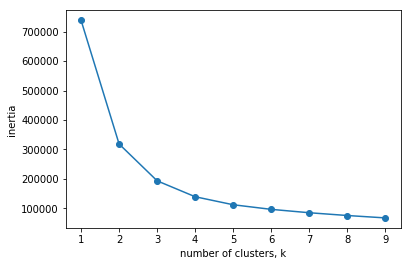

In [51]:
# Clustering

dfWriting = dfWriting.astype('float64')

# df2 = df2.reset_index()
# figure out number of clusters via KMeans
from sklearn.cluster import KMeans

ks = list(range(1, 10))
inertias = []

for k in ks:
    
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Fit model to samples
    kmeans.fit(dfWriting.values)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

%matplotlib inline

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

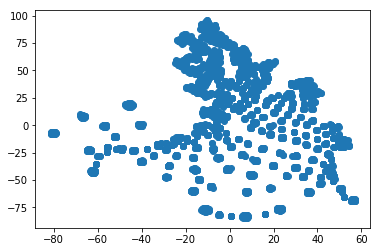

In [53]:
# T-SNE method (to identify clusters)

from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(dfWriting.values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys)
plt.show()

In [55]:
#DB scan

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=3).fit(dfWriting.values)

labels = dbscan.labels_

print("Number of points: %i" % label.size)

NameError: name 'label' is not defined

In [ ]:
clf = NearestCentroid()
clf.fit(dfWriting.values, label)

print(clf.centroids_.shape)

In [ ]:
top_words = visualize_clusters(df, clf.centroids_.shape[0], clf.centroids_)

In [57]:
#KMeans

import collections
kmeans_obj = KMeans(n_clusters=10, max_iter=1000).fit(dfWriting.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: ▲, ❤, ️, ︎, ¿, ®, …, —, i, s, 
CLUSTER 2: ⬅, ¿, ︎, ➜, ️, ✨, ❤, —, i, s, 
CLUSTER 3: ¿, ®, ▲, ➜, ⬅, ︎, …, —, s, i, 
CLUSTER 4: fight, figlia, figura, field, finde, …, —, ®, i, s, 
CLUSTER 5: fight, figlia, figura, figure, figured, figuring, literary, —, s, i, 
CLUSTER 6: fifth, fight, figlia, figura, figure, figured, fifa, ️, s, i, 
CLUSTER 7: ▲, ❤, ️, ︎, ®, …, ¿, —, i, s, 
CLUSTER 8: ▲, ❤, ️, ︎, ¿, ®, …, —, s, i, 
CLUSTER 9: figlia, figura, figure, figured, figuring, fifth, …, —, s, i, 
CLUSTER 10: ⬅, ✨, ️, ︎, ¿, ®, ▲, —, s, i, 


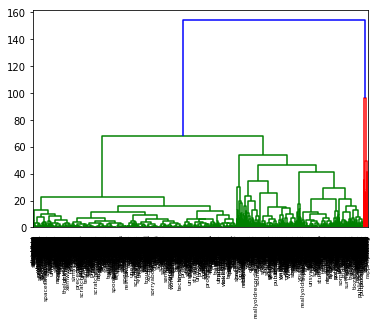

In [59]:
#Hierarchical clustering

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(dfWriting.values, method='complete', )

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=dfWriting.columns,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(dfWriting.values)
label = ward.labels_

print("Number of points: %i" % label.size)

Number of points: 3177


In [63]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

clf = NearestCentroid()
clf.fit(dfWriting.values, label)

print(clf.centroids_.shape)

(10, 9581)


In [64]:
def visualize_clusters(df, n_clusters, centroids, n_words=10, printed=True):   
    # try to get the most informative words of each cluster
    words = {}
    vocabulary = dfWriting.columns
    for n in range(n_clusters):
        words[n] = []
        if printed: print('CLUSTER ' + str(n+1) + ': ', end='')
        arr = centroids[n]
        indices = arr.argsort()[-n_words:]
        for i in indices:
            if printed: print(vocabulary[i], end=', '),
            words[n].append(vocabulary[i])
        print('')
    return words

top_words = visualize_clusters(df, clf.centroids_.shape[0], clf.centroids_)

CLUSTER 1: fight, figlia, figura, field, finding, ¿, …, —, i, s, 
CLUSTER 2: fight, figlia, figura, figure, figured, figuring, ️, —, s, i, 
CLUSTER 3: figlia, figura, figure, figured, figuring, fifth, …, —, s, i, 
CLUSTER 4: fight, figlia, figura, figure, figured, figuring, ️, —, s, i, 
CLUSTER 5: fight, figlia, figura, figure, figured, figuring, ️, —, s, i, 
CLUSTER 6: fifth, fight, figlia, figura, figure, figured, fifa, ️, s, i, 
CLUSTER 7: figlia, figura, feurzig, flower, ️, ✨, —, ❤, i, s, 
CLUSTER 8: figlia, figura, figure, figured, figuring, fifth, ®, —, i, s, 
CLUSTER 9: fight, figlia, figura, figure, figured, figuring, ️, —, s, i, 
CLUSTER 10: figlia, figura, fidèle, ▲, ︎, ➜, ⬅, —, s, i, 


In [65]:
dfWriting.to_csv('dfWritingWhole.csv')

## References

Brennan, K. (2013). Best of both worlds: Issues of structure and agency in computational creation, in and out of school. (Doctoral thesis). Massachusetts Institute of Technology, Cambridge, MA.   

Illich, I. (1970). Deschooling Society. 

Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation (Vol. 521423740): Cambridge university press Cambridge.

Schön, D. A. (1987). Educating the reflective practitioner: Toward a new design for teaching and learning in the professions. 
